# Challenge: Find Two Numbers That Add Up to K

**Statement**
* Given a list of integers, `nums`, and an integer target, `k`, find two numbers in the list that sum up to the target `k`.
* There is exactly one solution for each input, and each element of the list can only be used once in the solution. The order of the returned elements does not matter.

**Constraints**:

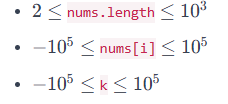


# Examples

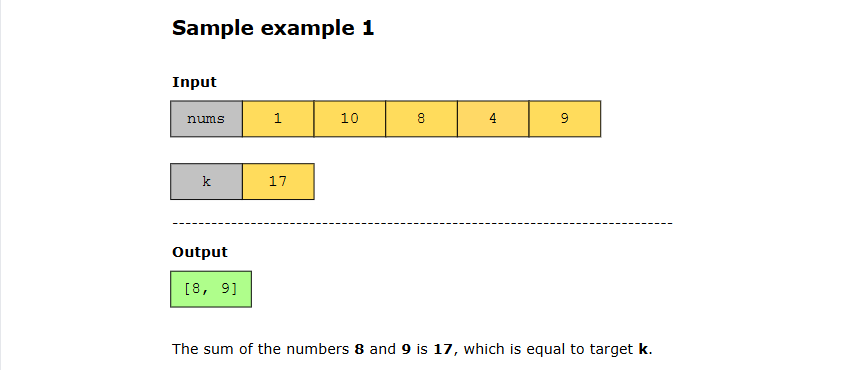

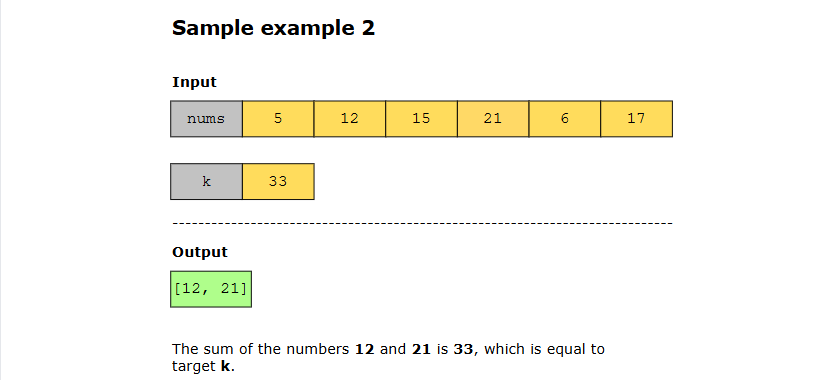

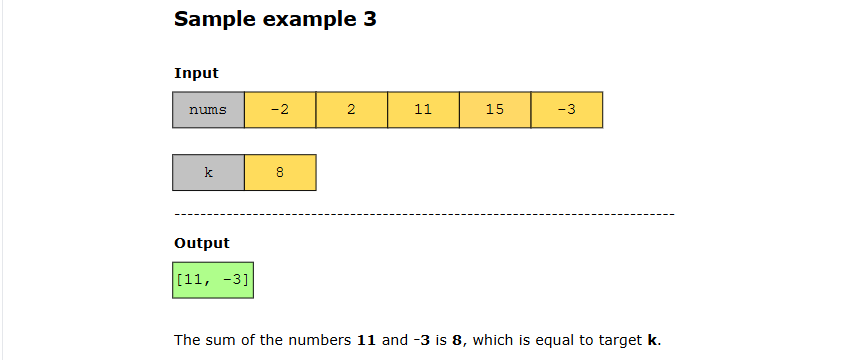


# Solution 1: Naive approach

* The naive approach involves iterating through the entire list and, for each element, checking if there’s another element that, when added to it, equals the specified target, `k`.
* This is achieved by using a nested loop, where each loop iterates over the entire list.
* Essentially, it compares each element with every other element in the list to find a pair that sums up to the target `k`.

In [2]:
def find_sum(nums, k):
    result = []
    
    for i in range(len(nums)):
        for j in range(i + 1, len(nums)):
            # Check if the sum of current pair equals the target sum (k)
            if nums[i] + nums[j] == k:
                # If found, append the pair to the result list and return
                result.append(nums[i])
                result.append(nums[j])
                return result
    
    return result

# Driver code
def main():
    inputs = [[1, 2, 3, 4],
            [1, 2],
            [2, 2],
            [-4, -1, -9, 1, -7],
            [25, 50, 75, 100, 400]]

    k = [5, 3, 4, -3, 425]

    for i in range(len(inputs)):
        print(i + 1, ".\tArray: ", inputs[i], sep="")
        print("\tk: ", k[i], sep="")
        print("\n\tResult: ", find_sum(inputs[i], k[i]), sep="")
        print("-" * 100)


if __name__ == "__main__":
    main()

1.	Array: [1, 2, 3, 4]
	k: 5

	Result: [1, 4]
----------------------------------------------------------------------------------------------------
2.	Array: [1, 2]
	k: 3

	Result: [1, 2]
----------------------------------------------------------------------------------------------------
3.	Array: [2, 2]
	k: 4

	Result: [2, 2]
----------------------------------------------------------------------------------------------------
4.	Array: [-4, -1, -9, 1, -7]
	k: -3

	Result: [-4, 1]
----------------------------------------------------------------------------------------------------
5.	Array: [25, 50, 75, 100, 400]
	k: 425

	Result: [25, 400]
----------------------------------------------------------------------------------------------------


# Solution 1: Complexity analysis

**Time complexity**: The time complexity of this solution is `O(n^2)`, where n is the length of the list. This is because there is a nested loop, each iterating over the entire list. As a result, the total number of iterations is proportional to the square of the length of the list.

**Space complexity**: The space complexity is `O(1)` because no extra space is used.

# Solution 2: Using two pointers

To implement this approach, we first sort the given list in ascending order. Then, we initialize two pointers: one at the beginning of the list and the other at the end. These pointers will gradually move toward each other. At each step, we compute the sum of the values pointed to by these pointers. If the sum is smaller than the target we are looking for, we move the left pointer to the right. Conversely, if it’s larger, we move the right pointer to the left. We continue this process until we find a pair whose sum equals the target.

Below are the detailed steps of the algorithm:
1. Sort the input list in nondecreasing order.
2. Initialize two pointers, the `left` pointing to the beginning of the list and the `right` pointing to the end of the list.
3. While `left` is less than `right`:
    * Calculate the sum of elements at left and right.
    * If the sum is less than `k`, increment the `left` pointer.
    * If the sum is greater than `k`, decrement the `right` pointer.
    * If the sum is equal to `k`, append the elements at `left` and `right` to the result list and exit the loop.
4. Return the result list containing elements that sum up to `k`.

In [3]:
def find_sum(nums, k):
    nums.sort()
    
    left = 0
    right = len(nums) - 1
    
    result = []
    
    # Iterate until the pointers meet
    while left < right:
        # Calculate the sum of the current pair
        sum_val = nums[left] + nums[right]
        
        # If the sum is less than the target sum, move the left pointer to the right
        if sum_val < k:
            left += 1
        # If the sum is greater than the target sum, move the right pointer to the left
        elif sum_val > k:
            right -= 1
        # If the sum equals the target sum, add the pair to the result list and break the loop
        else:
            result.append(nums[left])
            result.append(nums[right])
            break  
    
    return result


# Driver code
def main():
    inputs = [[1, 2, 3, 4],
            [1, 2],
            [2, 2],
            [-4, -1, -9, 1, -7],
            [25, 50, 75, 100, 400]]

    k = [5, 3, 4, -3, 425]

    for i in range(len(inputs)):
        print(i + 1, ".\tArray: ", inputs[i], sep="")
        print("\tk: ", k[i], sep="")
        print("\n\tResult: ", find_sum(inputs[i], k[i]), sep="")
        print("-" * 100)


if __name__ == "__main__":
    main()

1.	Array: [1, 2, 3, 4]
	k: 5

	Result: [1, 4]
----------------------------------------------------------------------------------------------------
2.	Array: [1, 2]
	k: 3

	Result: [1, 2]
----------------------------------------------------------------------------------------------------
3.	Array: [2, 2]
	k: 4

	Result: [2, 2]
----------------------------------------------------------------------------------------------------
4.	Array: [-4, -1, -9, 1, -7]
	k: -3

	Result: [-4, 1]
----------------------------------------------------------------------------------------------------
5.	Array: [25, 50, 75, 100, 400]
	k: 425

	Result: [25, 400]
----------------------------------------------------------------------------------------------------


# Solution 2: Complexity Analysis

**Time complexity**:
* The time complexity of this solution is `O(nlogn)`, where `n` is the number of elements in the list.
* The sorting of the list takes `O(nlogn)`, and the loop iterates through the sorted list only once, which takes `O(n)` in the worst-case scenario.

**Space complexity**: The space complexity is `O(1)` because no extra space is used.

# Solution 3: Using binary search

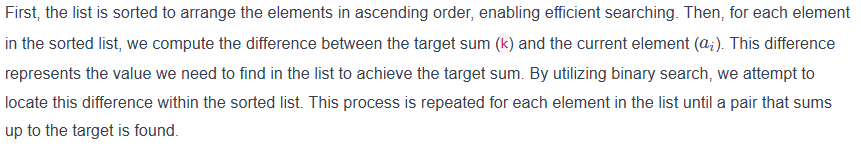

Below are the steps of the algorithm:
1. Sort the input list `nums` to enable efficient searching.
2. Iterate through each element in the list:
    * For each element `nums[j]`, find the index of the complement to the current element (`k - nums[j]`) using binary search because `k - nums[j]` will be the second element that will create a sum of `k` when added with the current element.
    * If the complement is found and it’s not the same element index, return the pair `[nums[j], k - nums[j]]`.

In [4]:
def binary_search(a, item):
    first = 0
    last = len(a) - 1
    
    found = False
    index = -1

    # Perform binary search until the item is found or the pointers meet
    while first <= last and not found:
        mid = (first + last) // 2
        
        # Check if the middle element is the item
        if a[mid] == item:
            # If found, update the index and set found to True
            index = mid
            found = True
        else:
            # If the item is smaller than the middle element, update the last pointer
            if item < a[mid]:
                last = mid - 1
            # If the item is larger than the middle element, update the first pointer
            else:
                first = mid + 1
                
    if found:
        return index
    else:
        return -1


def find_sum(nums, k):
    nums.sort()
    
    for j in range(len(nums)):
        # Find the index of the complement to the current element using binary search
        index = binary_search(nums, k - nums[j])
        
        # If the complement is found and it's not the same element, return the pair
        if index != -1 and index != j:
            return [nums[j], k - nums[j]]

    return []
    

# Driver code
def main():
    inputs = [[1, 2, 3, 4],
            [1, 2],
            [2, 2],
            [-4, -1, -9, 1, -7],
            [25, 50, 75, 100, 400]]

    k = [5, 3, 4, -3, 425]

    for i in range(len(inputs)):
        print(i + 1, ".\tArray: ", inputs[i], sep="")
        print("\tk: ", k[i], sep="")
        print("\n\tResult: ", find_sum(inputs[i], k[i]), sep="")
        print("-" * 100)


if __name__ == "__main__":
    main()

1.	Array: [1, 2, 3, 4]
	k: 5

	Result: [1, 4]
----------------------------------------------------------------------------------------------------
2.	Array: [1, 2]
	k: 3

	Result: [1, 2]
----------------------------------------------------------------------------------------------------
3.	Array: [2, 2]
	k: 4

	Result: [2, 2]
----------------------------------------------------------------------------------------------------
4.	Array: [-4, -1, -9, 1, -7]
	k: -3

	Result: [-4, 1]
----------------------------------------------------------------------------------------------------
5.	Array: [25, 50, 75, 100, 400]
	k: 425

	Result: [25, 400]
----------------------------------------------------------------------------------------------------


# Solution 3: Complexity analysis

**Time complexity**
* The time complexity of this solution is `O(nlogn)`, where n is the number of elements in the list. 
* The sorting of the list takes `O(nlogn)`, and the binary search takes `O(logn)` time to find a single element. 
* Therefore, the binary search for all n elements will take `O(nlogn)` time.

**Space complexity**: The space complexity is `O(1)` because no extra space is used.